**UNIFIED MENTOR INTERNSHIP**

**Problem Statement:**

* Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits.
Sales management today is the most important function in a commercial and business enterprise.
* Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv("/content/Amazon Sales data.csv")
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
sales.shape

(100, 14)

In [4]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
sales['Order Date']=pd.to_datetime(sales['Order Date'])
#extract year and month from Order Date
sales['Year']=sales['Order Date'].dt.year
sales['Month']=sales['Order Date'].dt.month
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [7]:
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Year              0
Month             0
dtype: int64

In [8]:
sales.rename(columns = {'Item Type':'Item'}, inplace = True)

In [9]:
sales.Item.value_counts()

Item
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

observation : Highest number of items sold is

* Clothes , Cosmetics
* Office Supplies
* Fruits , Personal Care

In [10]:
sales.describe()

,Order Date,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
count,100,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,2013-09-16 14:09:36,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013.230000,6.260000
min,2010-02-02 00:00:00,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010.000000,1.000000
25%,2012-02-14 12:00:00,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012.000000,4.000000
50%,2013-07-12 12:00:00,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013.000000,6.000000
75%,2015-04-07 00:00:00,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015.000000,9.250000
max,2017-05-22 00:00:00,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017.000000,12.000000
std,NaN,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.088231,3.353334


In [11]:
regions=sales['Region'].nunique()


In [12]:
print("Number of Regions : ",regions)

Number of Regions :  7


In [13]:
country=sales['Country'].nunique()
print("No of Countries : ",country)

No of Countries :  76


In [14]:
item=sales['Item'].nunique()
print("No of Items: ",item)

No of Items:  12


In [15]:
unit_sold=sales['Units Sold'].sum()
print("Units Sold : ",unit_sold)

Units Sold :  512871


In [16]:
unit_cost=sales['Unit Cost'].sum()
print("Unit Cost : ",unit_cost)

Unit Cost :  19104.8


In [17]:
Total_Rev=sales['Total Revenue'].sum()
print("Total Revenue : ",Total_Rev)

Total Revenue :  137348768.31


In [18]:
Total_Cost=sales['Total Cost'].sum()
print("Total Cost : ",Total_Cost)

Total Cost :  93180569.91000001


In [19]:
Total_Profit=sales['Total Profit'].sum()
print("Total Profit : ",Total_Profit)

Total Profit :  44168198.39999999


In [20]:
sales.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

Text(0, 0.5, 'Total Revenue')

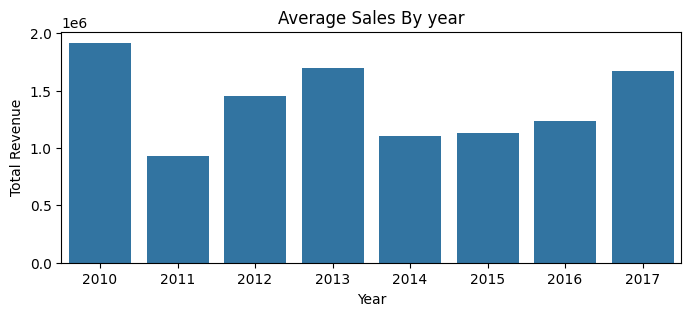

In [21]:
#year wise sales
year_sales=sales.groupby('Year')['Total Revenue'].mean()
plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index,y=year_sales.values,)
plt.title("Average Sales By year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")

Text(0.5, 1.0, 'Average Region Wise Profit ')

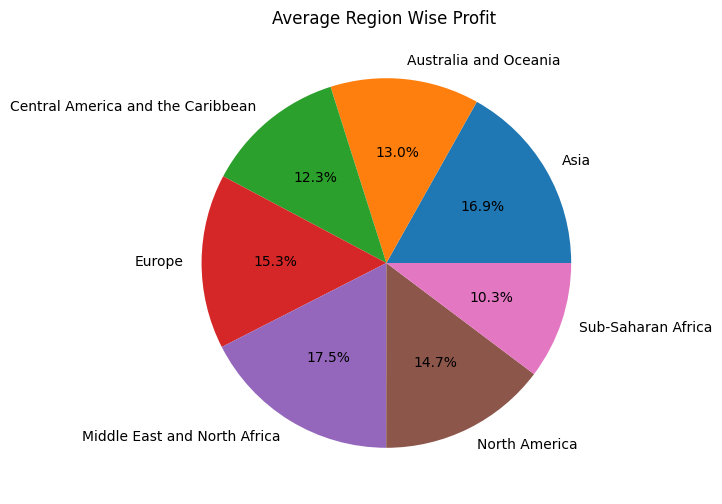

In [22]:
plt.figure(figsize=(6,6))
region_rev=sales.groupby('Region')['Total Profit'].mean()
plt.pie(region_rev,labels=region_rev.index,autopct='%1.1f%%')
plt.title("Average Region Wise Profit ")

In [23]:
#group Total Revenue by Item
Tot_rev_item=sales.groupby('Item')['Total Revenue'].sum()

Text(0, 0.5, 'Total Revenue')

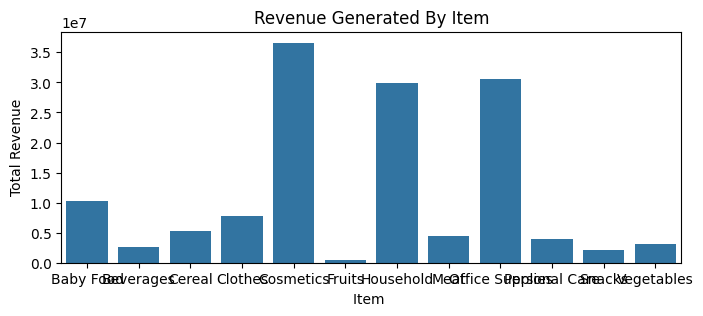

In [24]:
plt.figure(figsize=(8,3))
sns.barplot(Tot_rev_item)
plt.title("Revenue Generated By Item")
plt.xlabel("Item ")
plt.ylabel("Total Revenue")


In [25]:
#group total revenue by sales channel
tot_rev_channel=sales.groupby('Sales Channel')['Total Revenue'].mean()

Text(0.5, 1.0, 'Revenue by Channels')

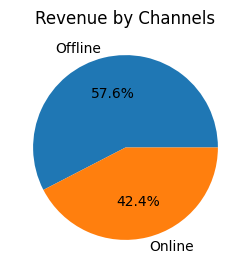

In [26]:
plt.figure(figsize=(8,3))
plt.pie(tot_rev_channel,labels=tot_rev_channel.index,autopct='%1.1f%%')
plt.title("Revenue by Channels")

<Axes: ylabel='Units Sold'>

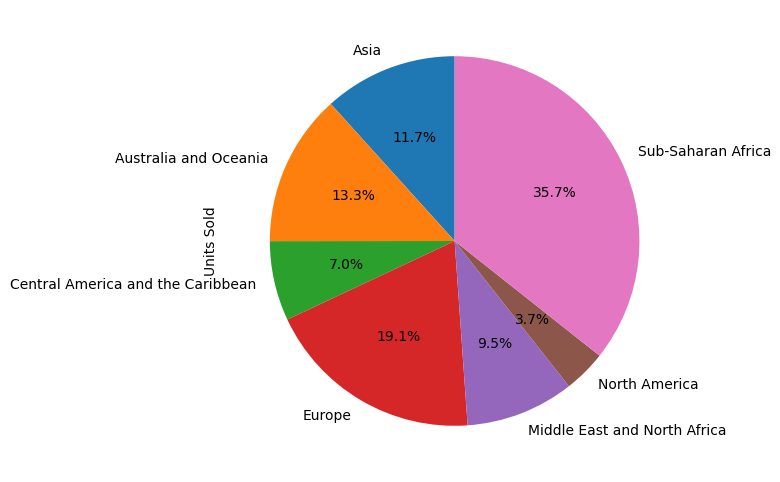

In [27]:
region_unitSold=sales.groupby('Region')['Units Sold'].sum()
plt.figure(figsize=(6,6))
region_unitSold.plot(kind='pie',labels=region_unitSold.index,autopct='%1.1f%%',startangle=90)
